# Machine Learning Part 1

## 1. Importing Libraries and Data

## 2. Data Cleaning

## 3. Data prep for regression analysis 

## 4. Regression Analysis

## Bonus: performance improvement after removing outliers

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Importing Data

path = r'/Users/alejandroguillen/Documents/Airbnb'

In [5]:
df_air = pd.read_csv(os.path.join(path, 'Data','Prepared','listings_cleaned.csv'), index_col=False)

### 2. Data Cleaning

In [6]:
df_air.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5121.0,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,12/2/19,0.29,2,0,0,NaN
1,2595.0,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,240,30,49,6/21/22,0.30,3,325,1,NaN
2,14991.0,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.722070,-73.989760,Private room,120,5,22,5/14/23,0.14,1,268,3,NaN
3,5136.0,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,276,21,3,8/10/22,0.03,1,275,1,NaN
4,59709.0,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.717800,-73.993200,Entire home/apt,325,7,69,4/28/23,0.47,1,38,23,NaN
5,5178.0,Rental unit in New York · ★4.26 · 1 bedroom · ...,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,589,5/14/23,3.44,1,10,51,NaN
6,15341.0,Condo in New York · ★4.56 · 1 bedroom · 2 beds...,60049,Ted,Manhattan,Lower East Side,40.721359,-73.993668,Entire home/apt,315,30,35,5/23/23,0.30,1,160,4,NaN
7,5203.0,Rental unit in New York · ★4.91 · 1 bedroom · ...,7490,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,7/21/17,0.71,1,0,0,NaN
8,5803.0,Townhouse in Brooklyn · ★4.71 · 1 bedroom · 1 ...,9744,Laurie,Brooklyn,South Slope,40.668010,-73.987840,Private room,134,3,233,5/15/23,1.36,3,148,21,NaN
9,60164.0,Loft in New York · ★4.39 · 3 bedrooms · 3 beds...,289653,Harrison,Manhattan,Tribeca,40.720120,-74.003970,Entire home/apt,500,30,110,11/18/22,0.77,1,45,2,NaN


In [7]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43541 entries, 0 to 43540
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43541 non-null  float64
 1   name                            43541 non-null  object 
 2   host_id                         43541 non-null  int64  
 3   host_name                       43541 non-null  object 
 4   neighbourhood_group             43541 non-null  object 
 5   neighbourhood                   43541 non-null  object 
 6   latitude                        43541 non-null  float64
 7   longitude                       43541 non-null  float64
 8   room_type                       43541 non-null  object 
 9   price                           43541 non-null  int64  
 10  minimum_nights                  43541 non-null  int64  
 11  number_of_reviews               43541 non-null  int64  
 12  last_review                     

In [8]:
#Dropping license column

df_air = df_air.drop('license', axis=1)

In [9]:
# Checking results

df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5121.0,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,12/2/19,0.29,2,0,0
1,2595.0,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,6/21/22,0.30,3,325,1
2,14991.0,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,5/14/23,0.14,1,268,3
3,5136.0,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,8/10/22,0.03,1,275,1
4,59709.0,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,4/28/23,0.47,1,38,23


In [10]:
# Checking for missing values

df_air.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10490
reviews_per_month                 10490
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

#### Note:  last_review and reviews_per_month have the same amount of missing values. They are related to the fact that these hosts have zero reviews (both in general and also in the past 12 months). A lot of of them also have no availability. Will keep them for now.

In [11]:
# Checking for duplicates

dups = df_air.duplicated()

In [12]:
dups.shape #no dups

(43541,)

/var/folders/9m/8nqk2r316sbdm8n2bttyp65c0000gn/T/ipykernel_28004/473096777.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_air['availability_365'], bins=10) # Shows extreme values


<Axes: xlabel='availability_365', ylabel='Density'>

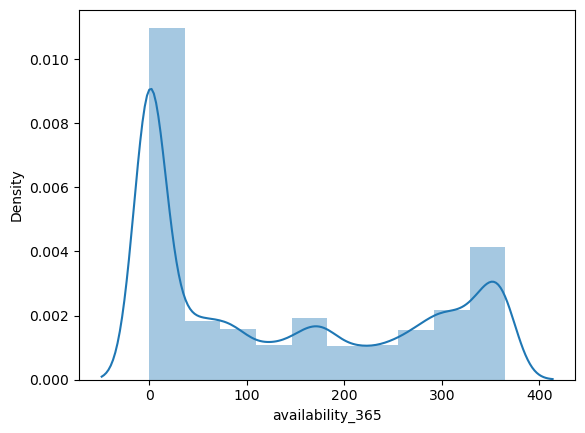

In [13]:
# Checking for extreme values
sns.distplot(df_air['availability_365'], bins=10) # Shows extreme values

# Some of the outliers in the high values may need to be removed. Let's keep them for now.

In [14]:
df_air['availability_365'].mean()

137.0350703934223

In [15]:
df_air['availability_365'].median()

89.0

In [16]:
df_air['availability_365'].max()

365

### 3. Data Prep for Regression Analysis

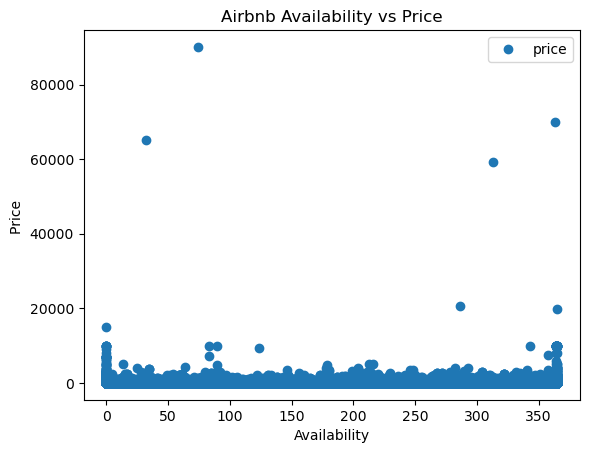

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_air.plot(x = 'availability_365', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Airbnb Availability vs Price')  
plt.xlabel('Availability')  
plt.ylabel('Price ')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_air['availability_365'].values.reshape(-1,1)
y = df_air['price'].values.reshape(-1,1)

In [19]:
X

array([[  0],
       [325],
       [268],
       ...,
       [288],
       [155],
       [250]])

In [20]:
y

array([[ 60],
       [240],
       [120],
       ...,
       [382],
       [199],
       [662]])

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.


In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

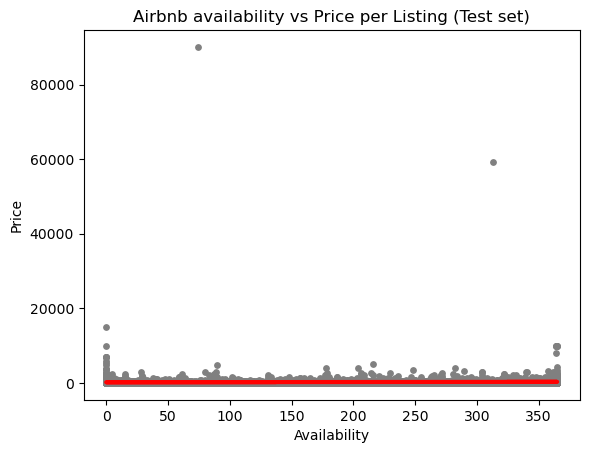

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Airbnb availability vs Price per Listing (Test set)')
plot_test.xlabel('Availability')
plot_test.ylabel('Price')
plot_test.show()

#### Note: the line appears to be accurate (since dots are very close to it) and constant (stays the same), even if it's very low. Diversity of prices are still present within narrow range.

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29565692]]
Mean squared error:  1053797.7802163472
R2 score:  0.0015278203384899713


In [28]:
y_predicted

array([[279.41559445],
       [290.35490038],
       [202.84045292],
       ...,
       [183.03143947],
       [183.03143947],
       [223.2407802 ]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,175,279.415594
1,361,290.354900
2,420,202.840453
3,186,279.711251
4,46,276.754682
5,150,183.031439
6,456,198.701256
7,20,183.031439
8,120,288.876616
9,29,183.031439


#### Note: even though the line was very close to the dots of the scatterplot, here we can see that the predicted numbers are not close to the actual numbers; indeed, the differences are quite noticeable. This indicates that these two variables don't work to test the hyphotesis for this supervised model, which is: the less availability the listing has, the more expensive it is. 